In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import pandas as pd

file_path =  '/content/drive/MyDrive/hhar_data.csv'

data = pd.read_csv(file_path, header=None)

data.columns = ['User_ID', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Activity']

print(data.head())


   User_ID     Acc_X      Acc_Y     Acc_Z Activity
0        0 -0.565032  -9.572019 -0.614113    stand
1        0 -0.832584  -9.713276 -0.606930    stand
2        0 -1.018134  -9.935339 -0.544082    stand
3        0 -1.222838 -10.142437 -0.566229    stand
4        0 -1.577180 -10.480618 -0.402824    stand


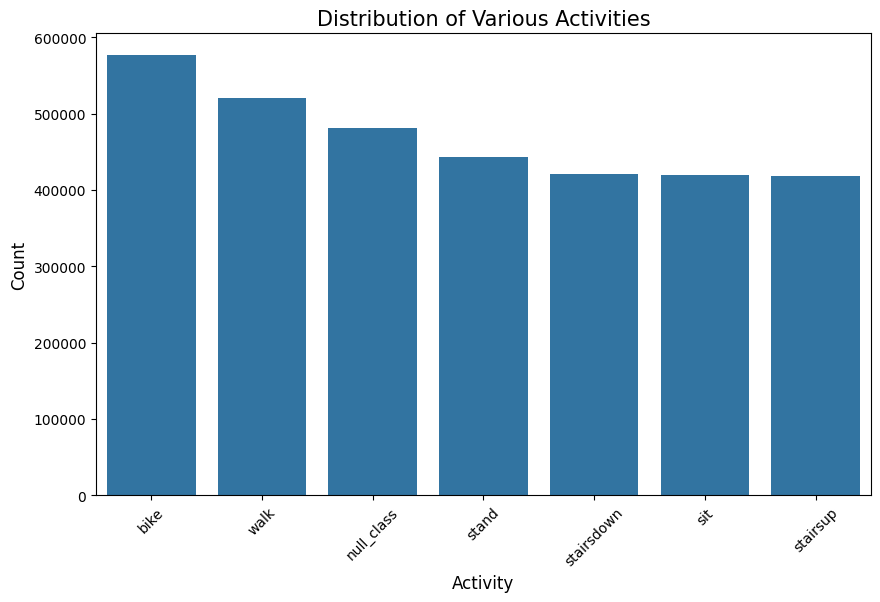

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

activity_counts = data['Activity'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values)

plt.xlabel('Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Various Activities', fontsize=15)
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

data = data[data['Activity'] != 'null_class']

data.reset_index(drop=True, inplace=True)

print(data['Activity'].value_counts())


Activity
bike          576221
walk          520193
stand         442724
stairsdown    420659
sit           419883
stairsup      418608
Name: count, dtype: int64


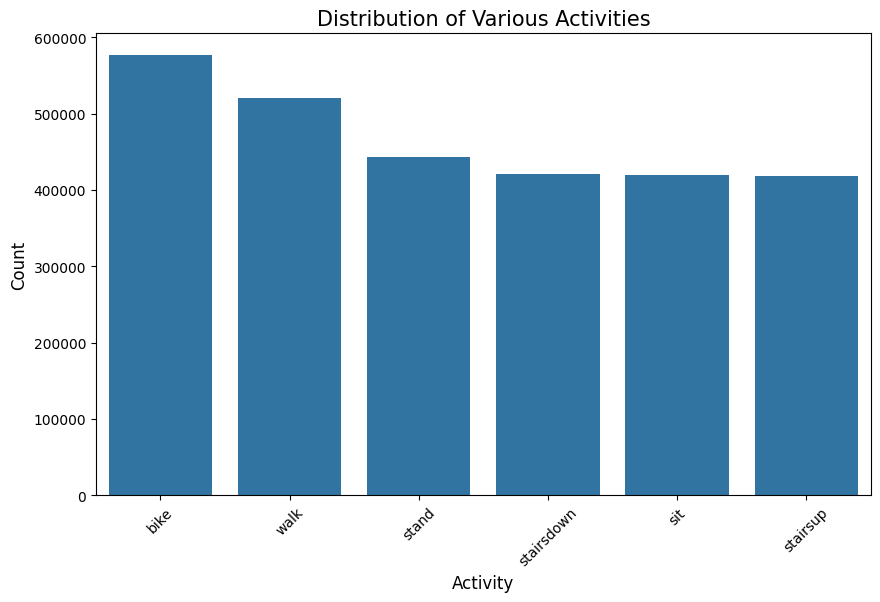

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

activity_counts = data['Activity'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values)

plt.xlabel('Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Various Activities', fontsize=15)
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

X = data.drop('Activity', axis=1)
y = data['Activity']

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

new_data = pd.DataFrame(X_resampled, columns=data.columns[:-1])
new_data['Activity'] = y_resampled

print(new_data['Activity'].value_counts())


Activity
stand         576221
sit           576221
walk          576221
stairsup      576221
stairsdown    576221
bike          576221
Name: count, dtype: int64


Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = new_data.drop('Activity', axis=1)
y = new_data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[101923  44897  11468   1910   1853  10869]
 [ 34939 110864    107     12   1718  25178]
 [ 26710  18945  25725   6185  55455  39731]
 [ 24855  19502  21865   5438  61838  38711]
 [ 10760  10812  25753  23933  90933  11228]
 [  5022  13659  35829  18623  67111  32837]]

Classification Report:
              precision    recall  f1-score   support

        bike       0.50      0.59      0.54    172920
         sit       0.51      0.64      0.57    172818
  stairsdown       0.21      0.15      0.18    172751
    stairsup       0.10      0.03      0.05    172209
       stand       0.33      0.52      0.40    173419
        walk       0.21      0.19      0.20    173081

    accuracy                           0.35   1037198
   macro avg       0.31      0.35      0.32   1037198
weighted avg       0.31      0.35      0.32   1037198



Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = new_data.drop('Activity', axis=1)
y = new_data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

Confusion Matrix:
[[140346    711  14326  11084   1294   5159]
 [   540 170871    325    397    440    245]
 [ 10963    317 116334  25545   2260  17332]
 [  8099    483  25299 116539   2569  19220]
 [  1018    448   2509   2815 162910   3719]
 [  4721    319  20898  23599   3995 119549]]

Classification Report:
              precision    recall  f1-score   support

        bike       0.85      0.81      0.83    172920
         sit       0.99      0.99      0.99    172818
  stairsdown       0.65      0.67      0.66    172751
    stairsup       0.65      0.68      0.66    172209
       stand       0.94      0.94      0.94    173419
        walk       0.72      0.69      0.71    173081

    accuracy                           0.80   1037198
   macro avg       0.80      0.80      0.80   1037198
weighted avg       0.80      0.80      0.80   1037198

Accuracy of the model: 0.7969057017078707


RandomForest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = new_data.drop('Activity', axis=1)
y = new_data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)


Confusion Matrix:
[[148778    504  10601   8630    815   3592]
 [   371 171581    191    257    271    147]
 [  9180    231 122589  23050   1924  15777]
 [  6246    355  21045 125212   2128  17223]
 [   782    403   1527   1772 166672   2263]
 [  2957    260  14034  18636   3465 133729]]

Classification Report:
              precision    recall  f1-score   support

        bike       0.88      0.86      0.87    172920
         sit       0.99      0.99      0.99    172818
  stairsdown       0.72      0.71      0.72    172751
    stairsup       0.71      0.73      0.72    172209
       stand       0.95      0.96      0.96    173419
        walk       0.77      0.77      0.77    173081

    accuracy                           0.84   1037198
   macro avg       0.84      0.84      0.84   1037198
weighted avg       0.84      0.84      0.84   1037198

Accuracy of the model: 0.8374109861376516


1D CNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X = new_data.drop('Activity', axis=1).values
y = new_data['Activity'].values

X = (X - X.mean()) / X.std()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4%}")


Epoch 1/10
37815/37815 [==============================] - 132s 3ms/step - loss: 0.9313 - accuracy: 0.6265
Epoch 2/10
37815/37815 [==============================] - 125s 3ms/step - loss: 0.8347 - accuracy: 0.6625
Epoch 3/10
37815/37815 [==============================] - 123s 3ms/step - loss: 0.8146 - accuracy: 0.6703
Epoch 4/10
37815/37815 [==============================] - 148s 4ms/step - loss: 0.8034 - accuracy: 0.6743
Epoch 5/10
37815/37815 [==============================] - 138s 4ms/step - loss: 0.7952 - accuracy: 0.6772
Epoch 6/10
37815/37815 [==============================] - 130s 3ms/step - loss: 0.7882 - accuracy: 0.6795
Epoch 7/10
37815/37815 [==============================] - 126s 3ms/step - loss: 0.7837 - accuracy: 0.6807
Epoch 8/10
37815/37815 [==============================] - 131s 3ms/step - loss: 0.7806 - accuracy: 0.6828
Epoch 9/10
37815/37815 [==============================] - 127s 3ms/step - loss: 0.7775 - accuracy: 0.6838
Epoch 10/10
37815/37815 [=====================

CNN with Neural Architecture search configuration

In [ ]:
from tensorflow.keras.layers import Conv1D, Input, Dense, Flatten, concatenate, MaxPooling1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np

# Assume X_train, y_train, X_test, and y_test are properly prepared and reshaped

input_layer = Input(shape=(X_train.shape[1], 1))

conv1 = Conv1D(filters=16, kernel_size=5, activation='elu', padding='same')(input_layer)
conv1 = MaxPooling1D(pool_size=2)(conv1)

conv2 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
conv2 = MaxPooling1D(pool_size=2)(conv2)

conv3 = Conv1D(filters=16, kernel_size=3, activation='elu', padding='same')(input_layer)
conv3 = MaxPooling1D(pool_size=2)(conv3)

merged = concatenate([conv1, conv2, conv3])

conv4 = Conv1D(filters=16, kernel_size=5, activation='relu', padding='same')(merged)
conv5 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(conv4)
conv6 = Conv1D(filters=32, kernel_size=5, activation='relu', padding='same')(conv5)

flatten = Flatten()(conv6)
dense = Dense(256, activation='relu')(flatten)
output_layer = Dense(y_train.shape[1], activation='softmax')(dense)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy of the 1D CNN model on the test set: {accuracy * 100:.2f}%')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 4, 1)]               0         []                            
                                                                                                  
 conv1d_7 (Conv1D)           (None, 4, 16)                96        ['input_3[0][0]']             
                                                                                                  
 conv1d_8 (Conv1D)           (None, 4, 32)                128       ['input_3[0][0]']             
                                                                                                  
 conv1d_9 (Conv1D)           (None, 4, 16)                64        ['input_3[0][0]']             
                                                                                              